In [8]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, roc_curve

with open('X.pkl', 'rb') as file:
    X = pickle.load(file)

with open('Y.pkl', 'rb') as file:
    y = pickle.load(file)

X_train, X_test = X[:4000], X[4000:]
y_train, y_test = y[:4000], y[4000:]


In [39]:
from sklearn.model_selection import GridSearchCV


n_list = list(range(1, 10))

param_grid = {'n_neighbors': n_list, 'p': [1, 2]}
#minkowski metrics for p 1 metric = manhattan, for p 2  metric = euclidan

grid_search = GridSearchCV(classificator, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2]},
             return_train_score=True, scoring='accuracy')

In [36]:
pd.DataFrame(grid_search.cv_results_).head(20)
#TO DO WYKRES 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004910,0.000707,0.533348,0.034827,1,1,"{'n_neighbors': 1, 'p': 1}",0.75125,0.88125,0.82625,...,0.81300,0.046298,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002587,0.001217,0.151757,0.002126,1,2,"{'n_neighbors': 1, 'p': 2}",0.88250,0.91375,0.88625,...,0.89350,0.012952,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.004559,0.001298,0.480602,0.021734,2,1,"{'n_neighbors': 2, 'p': 1}",0.87125,0.85500,0.87375,...,0.86600,0.006910,9,0.992188,0.875938,0.971250,0.970313,0.971562,0.956250,0.040985
3,0.002459,0.001134,0.158371,0.001753,2,2,"{'n_neighbors': 2, 'p': 2}",0.89625,0.89125,0.89125,...,0.89175,0.002806,3,0.984688,0.909062,0.974375,0.973437,0.972500,0.962813,0.027232
4,0.004528,0.001199,0.545707,0.050203,3,1,"{'n_neighbors': 3, 'p': 1}",0.87500,0.86125,0.88625,...,0.87350,0.008116,6,0.995625,0.882188,0.989375,0.991563,0.990625,0.969875,0.043894
5,0.002647,0.001152,0.164893,0.003435,3,2,"{'n_neighbors': 3, 'p': 2}",0.90875,0.89125,0.90375,...,0.89725,0.008155,1,0.990000,0.918438,0.985000,0.986250,0.984688,0.972875,0.027284
6,0.004612,0.001138,0.521065,0.035975,4,1,"{'n_neighbors': 4, 'p': 1}",0.84625,0.84500,0.85500,...,0.85000,0.004257,13,0.890938,0.854375,0.890938,0.882500,0.876250,0.879000,0.013500
7,0.002875,0.001317,0.180075,0.004258,4,2,"{'n_neighbors': 4, 'p': 2}",0.88375,0.88000,0.88625,...,0.88125,0.005420,4,0.917188,0.892813,0.912500,0.911563,0.901875,0.907188,0.008743
8,0.004586,0.001257,0.527178,0.025748,5,1,"{'n_neighbors': 5, 'p': 1}",0.85375,0.84875,0.85500,...,0.85275,0.002424,12,0.903750,0.856563,0.894375,0.889687,0.882500,0.885375,0.015973
9,0.002919,0.001302,0.173885,0.002966,5,2,"{'n_neighbors': 5, 'p': 2}",0.88750,0.88250,0.88125,...,0.88050,0.008085,5,0.922813,0.891875,0.911875,0.915937,0.904687,0.909437,0.010565


/home/wojtek/studia/naive-bayes-classifier/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


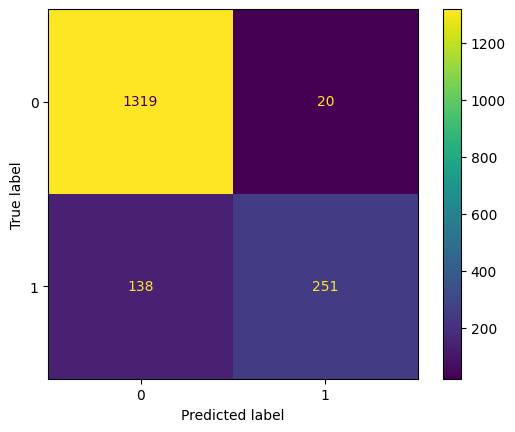

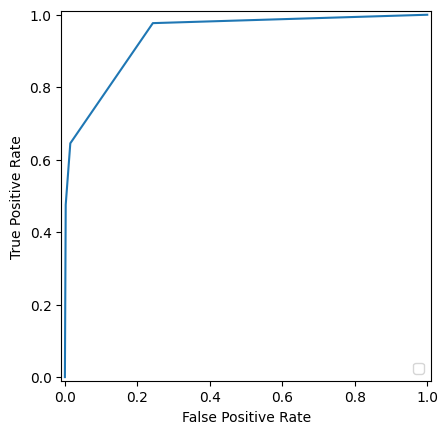

In [37]:
classificator = KNeighborsClassifier(n_neighbors = 3, p=2)
classificator.fit(X_train, y_train)

predict = classificator.predict(X_test.toarray())

cm = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

y_prob = classificator.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()